# Transformation with Missing Values

You may use an Image with **NaN** as missing values.

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid

## Read Image and cast type

Note that `NaN` values can only be assigned to `float` like arrays.

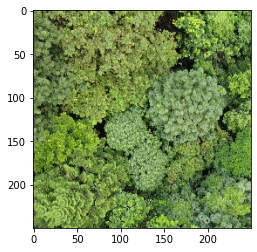

In [22]:
ar = imread("../../../data/image.jpg")[:1000:4, :1000:4]
plt.imshow(ar)
ar = ar.astype(np.float64)

## Create artificial hole, missing data

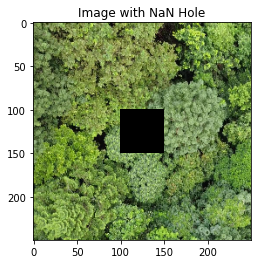

In [23]:
ar[100:-100, 100:-100] = np.nan
plt.imshow(ar / 256)
plt.title("Image with NaN Hole")
plt.show()

## Transform & Plot Transformation

Notice how GLCM works around the hole.

- For GLCM Windows that are totally **NaN**s, the result is a **NaN**.
- For GLCM Windows that partially contain **NaN**s, the result is the GLCM of the non-NaN values

GLCM Progress: 100%|██████████| 714k/714k [00:02<00:00, 330k Cells/s]  


Text(0.5, 0.98, 'Padded GLCM Features (Cube Rooted for visibility)')

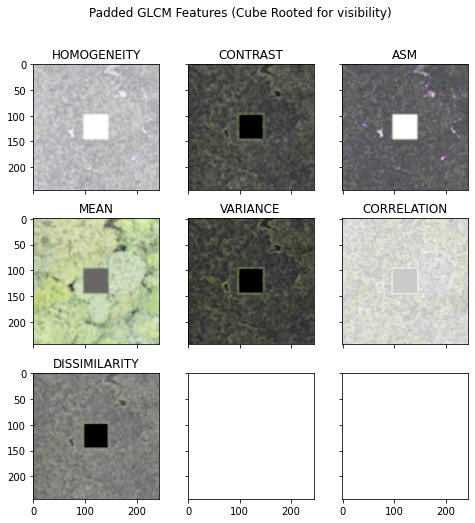

In [24]:
from glcm_cupy import glcm

radius = 2
step_size = 1
g = glcm(ar, bin_from=256, bin_to=16, radius=radius, step_size=step_size)
# Plot in a grid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 3),
                 axes_pad=0.4)

for ax, f_ix, title in zip(grid, range(g.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    ax.imshow(g[..., f_ix] ** (1 / 3))
    ax.set_title(title)
fig.suptitle('Padded GLCM Features (Cube Rooted for visibility)')

## Summary

- `glcm-cupy` can work around **NaN** values

### See Also

As we can use **NaNs**, we can **pad** the image to avoid reducing the height and width!

See the padding example if you haven't
